# Datenerkundung & Preprocessing #

## Inhalt ##
1. CSV einlesen und Preprocessing \
  1.1 Einlesen der CSV \
  1.2 Preprocessing \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.1 Timestamp entfernen \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.2 Pseudonym und Id seperat speichern und entfernen \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.3 Einen Zeilenumbruch nach 50 Zeichen einfügen, um lange Titel besser darzustellen \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.4 Whitespace und Emojis entfernen
2. Erste Beobachtungen zu den Daten \
 2.1 Daten auf fehlende und auffällige Werte untersuchen \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1.1 Beobachtungen
3. Weiteres Preprocessing \
 3.1 One Hot Encoding für \"Welche Sportarten interessieren dich am meisten?\" (Multiselect) \
 3.2 Kürzere Label für die Spalten 
4. Daten visualisieren \
 4.1 Demographische Daten \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.1 Beobachtungen \
 4.2 Ausgewählte Fragen \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.1 Welche Sportarten interessieren dich? \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.2 Fragen mit Ordinalskala (1-5 Fragen) \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.3 Kategorische Features
5. Weitere Aufbereitung der Daten auf Basis der Datenanalyse \
 5.1 Bereinigung der Daten \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1.1 \"Lieblingssportart\" aufbereiten \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1.2 \"Lieblingsessen\" aufbereiten \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1.3 \"Lieblingsmusiker/-band\" aufbereiten \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1.4 Aufbereitete Daten plotten
6. Encoding & Weiterverarbeitung \
 6.1 Lieblingsmusiker mit dem Genre des Musikers ersetzen \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.1.1 Aufbereitete Daten zwischenspeichern \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.1.2 Genres plotten \
 6.2\"Funktion\", \"Studiengang\", \"Lieblingssportart\", \"Lieblingsessen\" und \"Genre des Lieblingsmusikers\" encoden \
 6.3\"Geschlecht\" als numerische Werte \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3.1 Alle Features nach dem Encoding ausgeben
7. Entfernen von Spalten mit geringer Varianz \
 7.1 Die encodeten und gefilterten Daten zwischenspeichern

## Imports/Setup ##

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from IPython.display import HTML
from sklearn.feature_selection import VarianceThreshold

In [2]:
# auto reload local helpers
%load_ext autoreload
%autoreload 2

In [3]:
# our helpers module
import local_helpers as lh

In [4]:
# Update pyplot defaults
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

# 1. CSV einlesen und Preprocessing

In diesem Kapitel wird die CSV mit den Daten der Umfrage eingelesen und die Daten werden für die weitere Verwendung vorbereitet.

## 1.1 Einlesen der CSV

In [5]:
filename = "../datasets/survery_data_annonymized_230626.csv"
data = pd.read_csv(filename)
data.head()

,Timestamp,Alter,Geschlecht,"Bitte gib hier ein Pseudonym ein und merke dir dieses (z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene ""Datenpunkt"" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.",Welcher Funktion an der HSD fühlst du dich am meisten zugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Welche Sportarten interessieren dich am meisten (wähle maximal 5)?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,...,Strebst du nach dem Studium auch weiterhin eine akademische Laufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim Wandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?
0,2023/05/25 9:05:15 AM GMT+3,28,männlich,lalala-lololo,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen,4,...,1,5,3,2,5,5,2,2,3,3
1,2023/05/25 9:21:27 AM GMT+3,26,männlich,hbstr,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,...,3,3,2,2,4,3,3,4,3,4
2,2023/05/25 10:10:57 AM GMT+3,24,männlich,Panda,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,-,5,...,3,5,5,1,3,2,3,2,4,3
3,2023/05/30 11:25:32 PM GMT+3,23,männlich,TomTom Navigation,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,...,2,2,2,3,5,4,4,2,3,3
4,2023/05/31 11:17:51 AM GMT+3,24,weiblich,LcAbrgr,Student*in,MMI,3,Bouldern/Klettern,Klettern,4,...,1,1,5,5,2,3,4,3,3,4


## 1.2 Preprocessing

### 1.2.1 Timestamp entfernen

Der Timestamp wird entfernt, da er für die Betrachtung der Daten nicht relevant ist. Für bspw. das Machine Learning oder die Clusteranalyse ist er ggf. sogar problematisch, weil wir nicht möchten, dass die Vorhersagen oder die Einteilung in ein Cluster basierend auf dem Zeitpunkt des Ausfüllens der Umfrage geschieht.

In [6]:
data.drop("Timestamp", axis=1, inplace=True)

### 1.2.2 Pseudonym und Id seperat speichern und entfernen

Die Pseudonyme der Befragten werden seperat gespeichert, um ihnen später die Ergebnisse zuordnen zu können.

_Hinweis:_ Es sollten im Prozess keine Rows aus dem DataFrame entfernt werden, da sonst keine eindeutige Zuordnung mehr möglich ist.

In [7]:
pseudonym_df = data["Bitte gib hier ein Pseudonym ein und merke dir dieses (z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene \"Datenpunkt\" gefunden werden. Das Pseudonym wird für Andere sichtbar sein."]

data.drop("Bitte gib hier ein Pseudonym ein und merke dir dieses (z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene \"Datenpunkt\" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.", axis=1, inplace=True)

%store pseudonym_df

Stored 'pseudonym_df' (Series)


### 1.2.3 Einen Zeilenumbruch nach 50 Zeichen einfügen, um lange Titel besser darzustellen

Aufgrund der langen Titel der Spalten werden diese bei vielen Plots und anderen Ausgaben unlesbar. Daher wird ein Zeilenumbruch nach je 50 Zeichen eingefügt.

In [8]:
data.rename(columns=lambda title: lh.insert_linebreaks(title), inplace=True)
data.head()

,Alter,Geschlecht,Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Welche Sportarten interessieren dich am meisten (wähle\nmaximal 5)?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,...,Strebst du nach dem Studium auch weiterhin eine akademische\nLaufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim\nWandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?
0,28,männlich,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen,4,3,4,...,1,5,3,2,5,5,2,2,3,3
1,26,männlich,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,4,5,...,3,3,2,2,4,3,3,4,3,4
2,24,männlich,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,-,5,4,4,...,3,5,5,1,3,2,3,2,4,3
3,23,männlich,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,4,4,...,2,2,2,3,5,4,4,2,3,3
4,24,weiblich,Student*in,MMI,3,Bouldern/Klettern,Klettern,4,3,2,...,1,1,5,5,2,3,4,3,3,4


### 1.2.4 Whitespace und Emojis entfernen

Für die weitere Behandlung der Daten sind Whitespace und Emojis hinderlich. Daher werden diese aus den Daten entfernt.

In [9]:
# remove all unnessecary whitespace and emojis from the data
data = data.applymap(lambda x: lh.remove_emojis_and_whitespace(x) if isinstance(x, str) else x)

# data["Was ist dein Lieblingsessen? (nur eines angeben)"].value_counts()

# 2. Erste Beobachtungen zu den Daten

In diesem Kapitel werden die Daten genauer untersucht und erste Beobachtungen festgehalten. 

## 2.1 Daten auf fehlende und auffällige Werte untersuchen 

Die Daten werden mithilfe einiger Kennzahlen auf fehlende und auffällige Werte untersucht.

In [10]:
data.describe()

,Alter,Als wie sportlich würdest du dich einschätzen?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,Wie sehr interessierst du dich für Musik?,Wie gerne liest Du?,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?","Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?",...,Strebst du nach dem Studium auch weiterhin eine akademische\nLaufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim\nWandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,25.532258,3.290323,3.548387,3.854839,3.822581,2.822581,4.000000,3.112903,2.629032,3.741935,...,2.596774,3.032258,3.677419,3.403226,3.983871,3.096774,3.000000,3.032258,2.645161,3.370968
std,4.482087,0.981586,0.823376,0.989233,0.983873,1.166811,0.940875,1.229485,1.190590,0.904189,...,1.234207,1.200652,1.098049,1.151758,0.983335,0.935803,1.008163,1.100935,1.242641,0.995628
min,18.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,3.000000,3.000000,3.250000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,25.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,...,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000
75%,28.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.750000,4.000000
max,42.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 46 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                      --------------  ----- 
 0   Alter                                                                                                                       62 non-null     int64 
 1   Geschlecht                                                                                                                  62 non-null     object
 2   Welcher Funktion an der HSD fühlst du dich am meisten
zugehörig?                                                            62 non-null     object
 3   Welchem Studiengang fühlst du dich am meisten zugehörig?                                                                    62 non-n

In [12]:
pd.DataFrame(data.isnull().sum(), columns=['Number of NaN']).loc[lambda x: x['Number of NaN'] > 0]

,Number of NaN
Was ist dein Lieblingsessen? (nur eines angeben),4
Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben),7


### 2.1.1 Beobachtungen 

"Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in? (nur eine/n angeben)" hat 7 fehlende Einträge \
"Was ist dein Lieblingsessen? (nur eines angeben)" hat 4 fehlende Einträge

# 3. Weiteres Preprocessing

In diesem Kapitel werden die Daten weiter für die weitere Verarbeitung vorbereitet.

## 3.1 One Hot Encoding für "Welche Sportarten interessieren dich am meisten?" (Multiselect) 

Für jede Sportart wird ein neues Feature mit den Werten "ja/nein" codiert als "1/0" erstellt. So werden die Daten u. a. für verschiedene Machine-Learning- und Clustering-Verfahren vorbereitet.

In [13]:
sports_column_name = "Welche Sportarten interessieren dich am meisten (wähle\nmaximal 5)?"

encoded_columns = data[sports_column_name].str.get_dummies(sep=";")
short_column_labels_sportarten = encoded_columns.columns.map(lambda x: f"sportarten_{x}")
encoded_columns.columns = encoded_columns.columns.map(lambda x: f"Interesse an {x}? (encoded)")

data = data.join(encoded_columns)
data = data.drop(sports_column_name, axis=1)
data.head()

,Alter,Geschlecht,Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,...,Interesse an Leichtathletik? (encoded),Interesse an Reiten? (encoded),Interesse an Rennrad/Mountainbike? (encoded),Interesse an Schwimmen? (encoded),Interesse an Tanzen? (encoded),Interesse an Tennis? (encoded),Interesse an Volleyball? (encoded),Interesse an Wassersport? (encoded),Interesse an Wintersport? (encoded),Interesse an Yoga? (encoded)
0,28,männlich,Student*in,MMI,4,Joggen,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1
1,26,männlich,Student*in,MMI,3,Fußball,4,4,5,2,...,0,0,1,0,0,0,1,0,0,1
2,24,männlich,Student*in,MMI,2,-,5,4,4,3,...,0,0,0,0,1,0,0,0,0,1
3,23,männlich,Student*in,MMI,5,Trampolin,2,4,4,2,...,1,0,0,0,0,0,0,0,1,0
4,24,weiblich,Student*in,MMI,3,Klettern,4,3,2,1,...,0,0,0,0,0,0,0,0,0,0


## 3.2 Kürzere Label für die Spalten 

Da die Spalten die vollen Fragen aus dem Fragebogen als Label tragen, ist der Zugriff auf einzelne Spalten sehr mühsam. Eine Lösung dafür wäre die Umbennenung der Spalten. Allerdings gehen dann die vollen Fragen verloren, die für die Einordnung der Daten und selbsterklärende Plots hilfreich sind. Daher wird alternativ ein Dictionary mit den vollen Namen der Spalten (den Fragen) und kürzeren Labels für den schnelleren Zugriff erstellt.

In [14]:
short_labels = ["alter", "geschlecht", "funktion", "studiengang", "sportlichkeit", "lieblingssportart",
          "ernaehrung", "essengehen", "kochen", "feiern", "lieblingsessen", "musik", "lieblingsmusiker", "lesen", "schauspiel",
          "filme", "malen", "museumsbesuche", "videospiele", "social_media", "technologie", "astronomie", "naturwissenschaften",
          "freiwilligenarbeit", "soziales", "introvertiert", "fomo", "spontan", "verwirrt", "gluecklich", "geduldig", "streitlustig",
          "abenteuerlustig", "studienzweifel", "studium_zufriedenheit", "akademische_laufbahn", "lerngruppe", "prokrastinieren",
          "letzter_druecker", "neue_lebensmittel", "natur", "reisen", "handwerk", "sprachnachrichten", "geld",]
short_labels = short_labels + list(short_column_labels_sportarten)

# Create a dictionary with short labels as keys and full questions as values
short_labels_and_full_questions = dict(zip(short_labels, data.columns))

# Convert to series
columns = pd.Series(short_labels_and_full_questions)

# 4. Daten visualisieren

In diesem Kapitel werden die Daten visualisiert und mithilfe der Visualisierungen weiter erkundet.

## 4.1 Demographische Daten

Es werden zunächst die demographischen Daten (Alter, Geschlecht, Funktion und Studiengang) graphisch dargestellt.

<Axes: title={'center': 'Welchem Studiengang fühlst du dich am meisten zugehörig?'}>

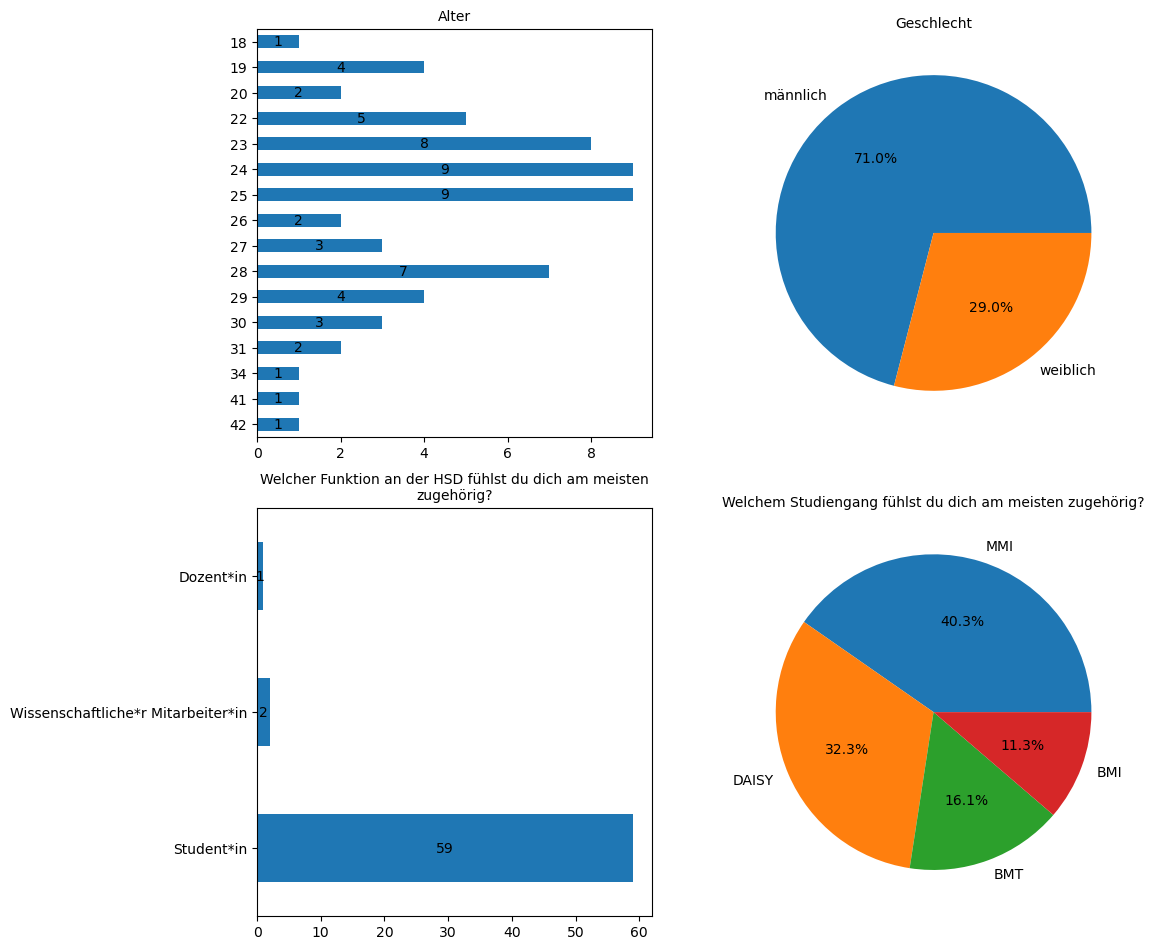

In [15]:
# Plot a chart with 4 subplots showing the distribution of the demographic data
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=3)

alter = data.value_counts(columns.alter).sort_index(ascending=False).plot.barh(ax=axes[0, 0], title=columns.alter, ylabel="")
alter.bar_label(alter.containers[0], fmt='%.0f', label_type='center')

data.value_counts(columns.geschlecht).plot.pie(ax=axes[0, 1], title=columns.geschlecht, ylabel="", autopct='%1.1f%%')

funktion = data.value_counts(columns.funktion).plot.barh(ax=axes[1, 0], title=columns.funktion, ylabel="")
funktion.bar_label(funktion.containers[0], fmt='%.0f', label_type='center')

data.value_counts(columns.studiengang).plot.pie(ax=axes[1, 1], title=columns.studiengang, ylabel="", autopct='%1.1f%%')

### 4.1.1 Beobachtungen

Es zeigt sich, dass ca. 70% der Befragten männlich und lediglich 30% weiblich sind. \
In der Altersverteilung wird ersichtlich, dass ein Großteil der Befragten zwischen 19 und 30 ist. Auffällig ist außerdem, dass mehr als ein Drittel der Befragten zwischen 23 und 25 ist. \
Dazu passt, dass fast alle Befragten Studierende sind. Dies ist aufgrund des Verhältnisses von Studierenden zu Dozierenden an der Hochschule wenig überraschend. \
Bei den Studiengängen überwiegen MMI und DAISY - dies ist vermutlich darauf zurückzuführen, dass die Studierenden des Data Sciene Moduls aus diesen beiden Studiengängen stammen.

## 4.2 Ausgewählte Fragen

### 4.2.1 _Welche Sportarten interessieren dich?_

Bei dieser Frage ist das Auslesen der Beliebtheit einzelner Sportarten aus den Rohdaten schwierig. Daher bietet sich hier eine Visualisierung an. 

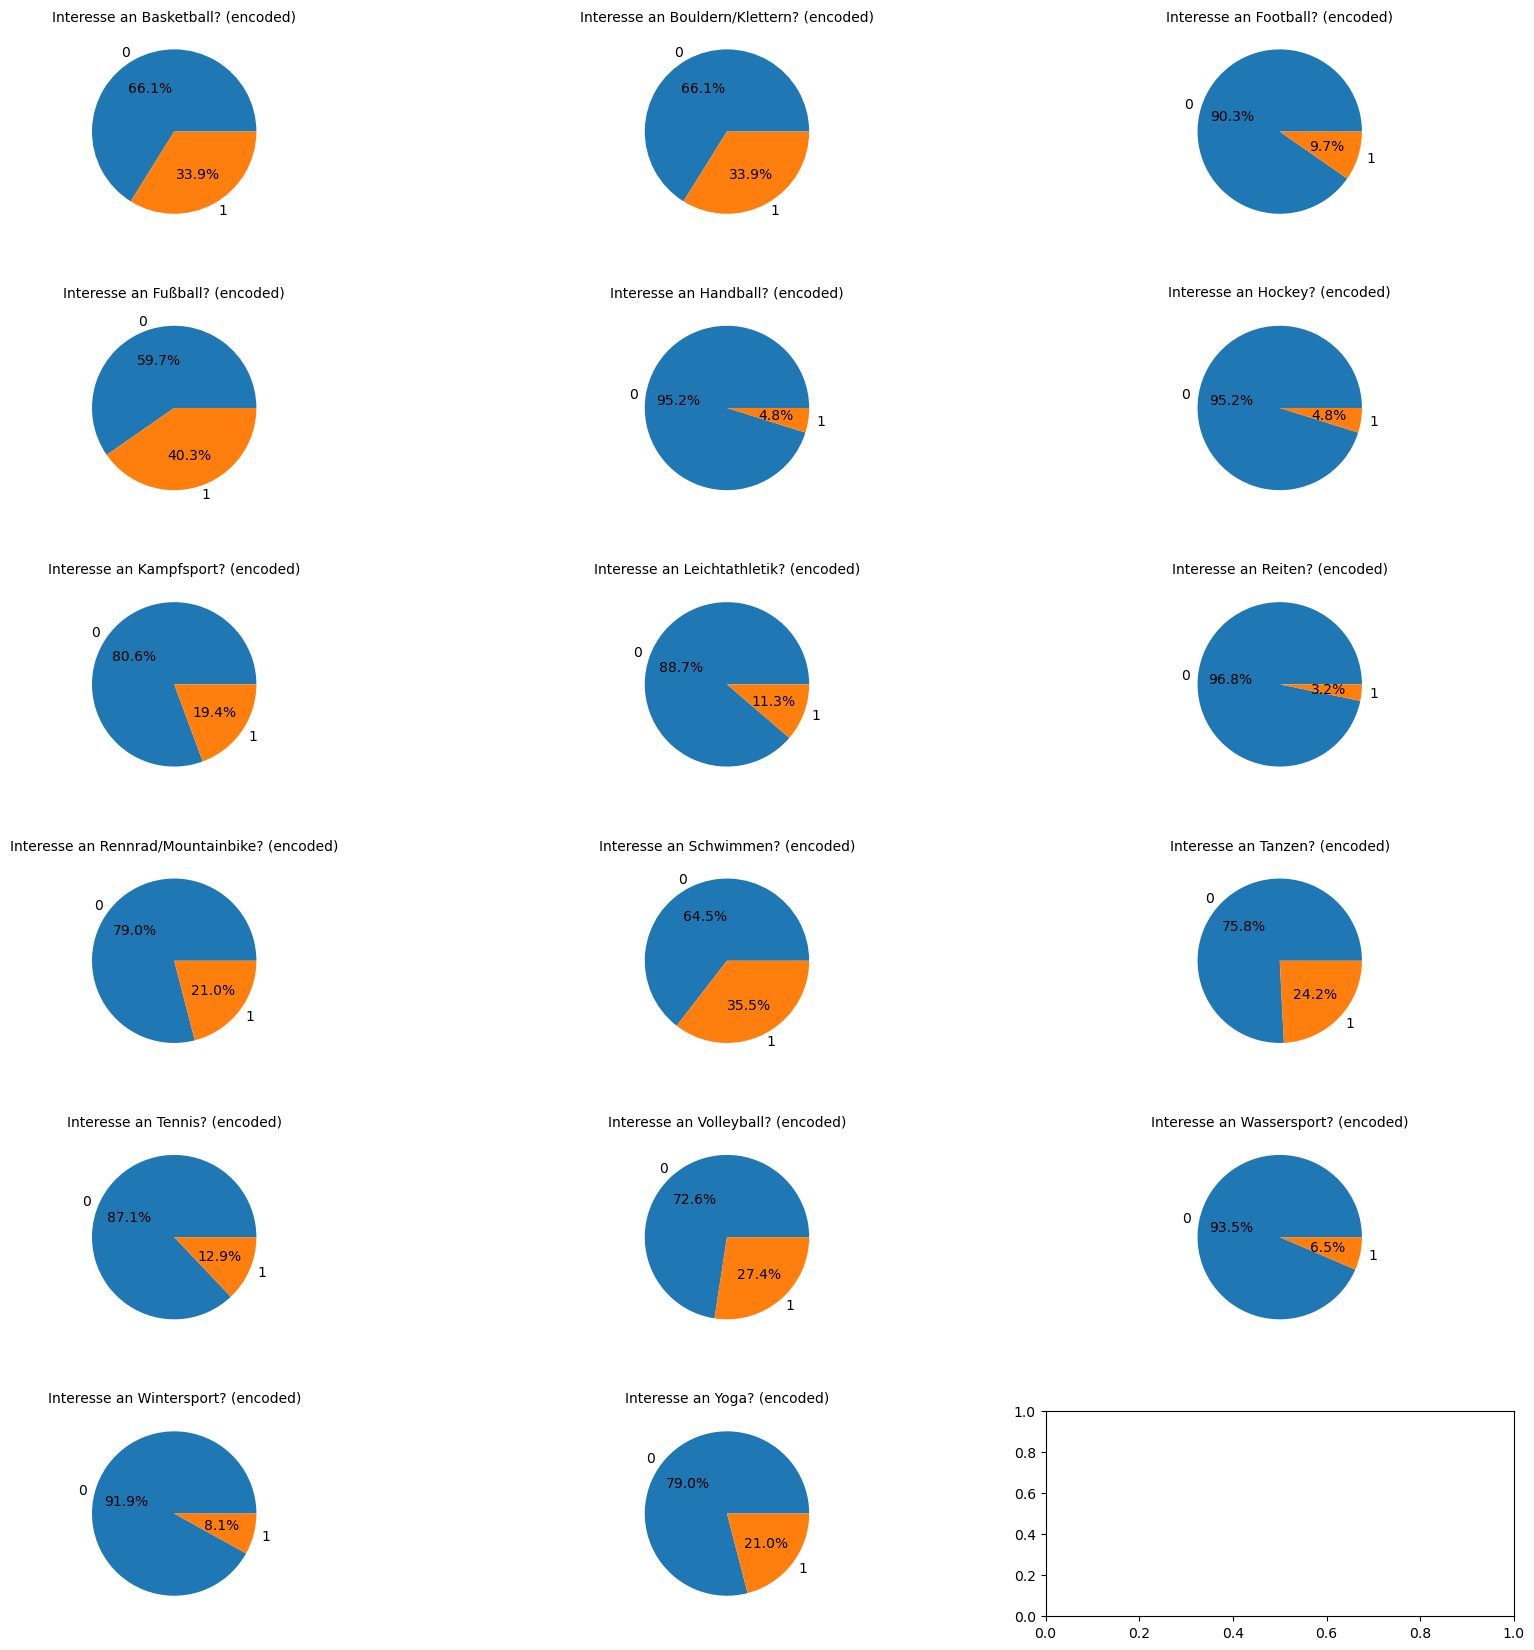

In [16]:
fig, axes = plt.subplots(6, 3, figsize=(17, 17))
fig.tight_layout(pad=3)

columns_sportarten = [column for column in columns.keys() if column.startswith("sportarten_")]

for i, column in enumerate(columns_sportarten):
  data.value_counts(columns[column]).plot.pie(ax=axes[i//3, i%3], title=columns[column], ylabel="", autopct='%1.1f%%') # "//" ist Division mit Abrundung

Es zeigt sich, dass einige Sportarten (Fußball, Basketball, Bouldern, Schwimmen) besonders beliebt sind und andere Sportarten (z. B. Reiten) besonders unbeliebt. \
Die folgende Grafik zeigt noch einmal den Vergleich der Sportarten untereinander: 

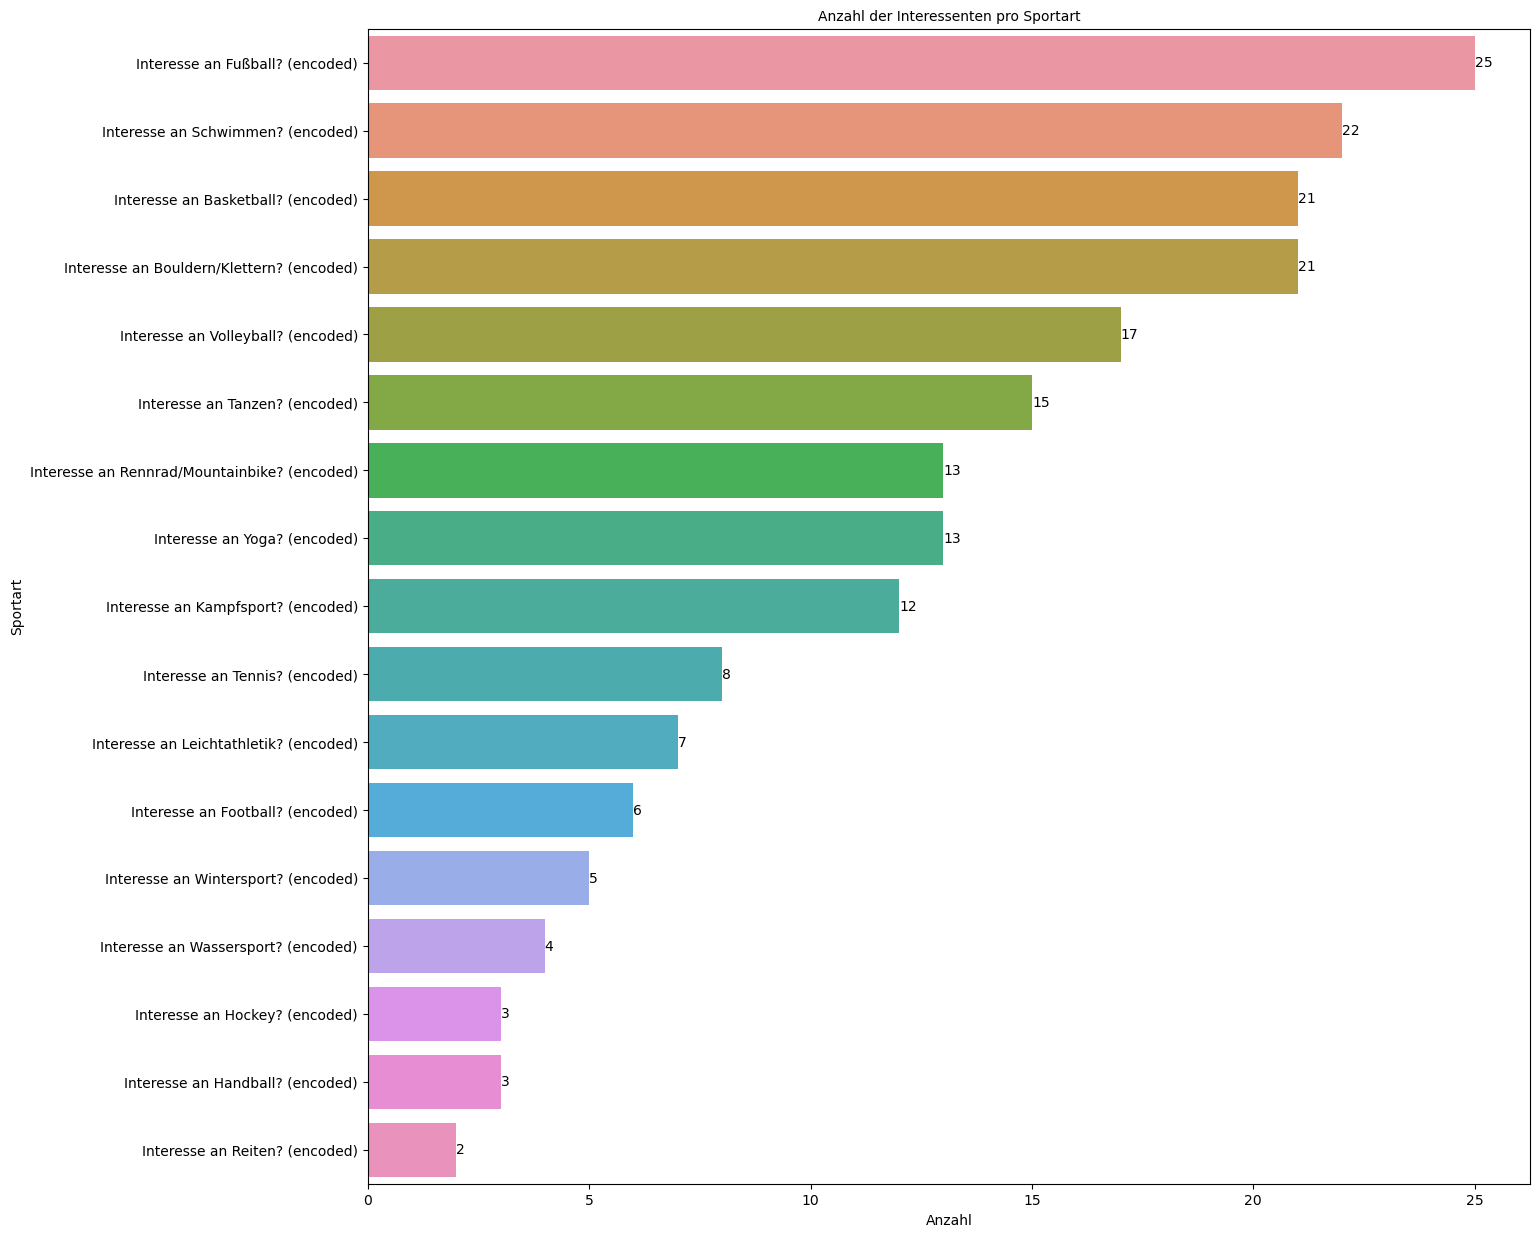

In [17]:
# Get all column names related to "Sportarten"
columns_sportarten = columns[columns.str.startswith('Interesse an')].values

# Create new DataFrame that stores the amount of votes for each "Sportart"
df_filtered_sportarten= pd.DataFrame(zip(columns_sportarten, data[columns_sportarten].sum()), columns=["Sportart", "Anzahl"])
df_filtered_sportarten = df_filtered_sportarten.sort_values(by="Anzahl", ascending=False)

ax = sb.barplot(x='Anzahl', y='Sportart', data=df_filtered_sportarten)
ax.set_title("Anzahl der Interessenten pro Sportart")

for i in ax.containers:
    ax.bar_label(i,)

### 4.2.2 Fragen mit Ordinalskala (1-5 Fragen)

Bei diesen Fragen ist die Verteilung der Antworten auf die Skala interessant. Es werden daher sortierte Bar Charts geplottet, um einen Überblick über die Verteilung der Werte zu bekommen.

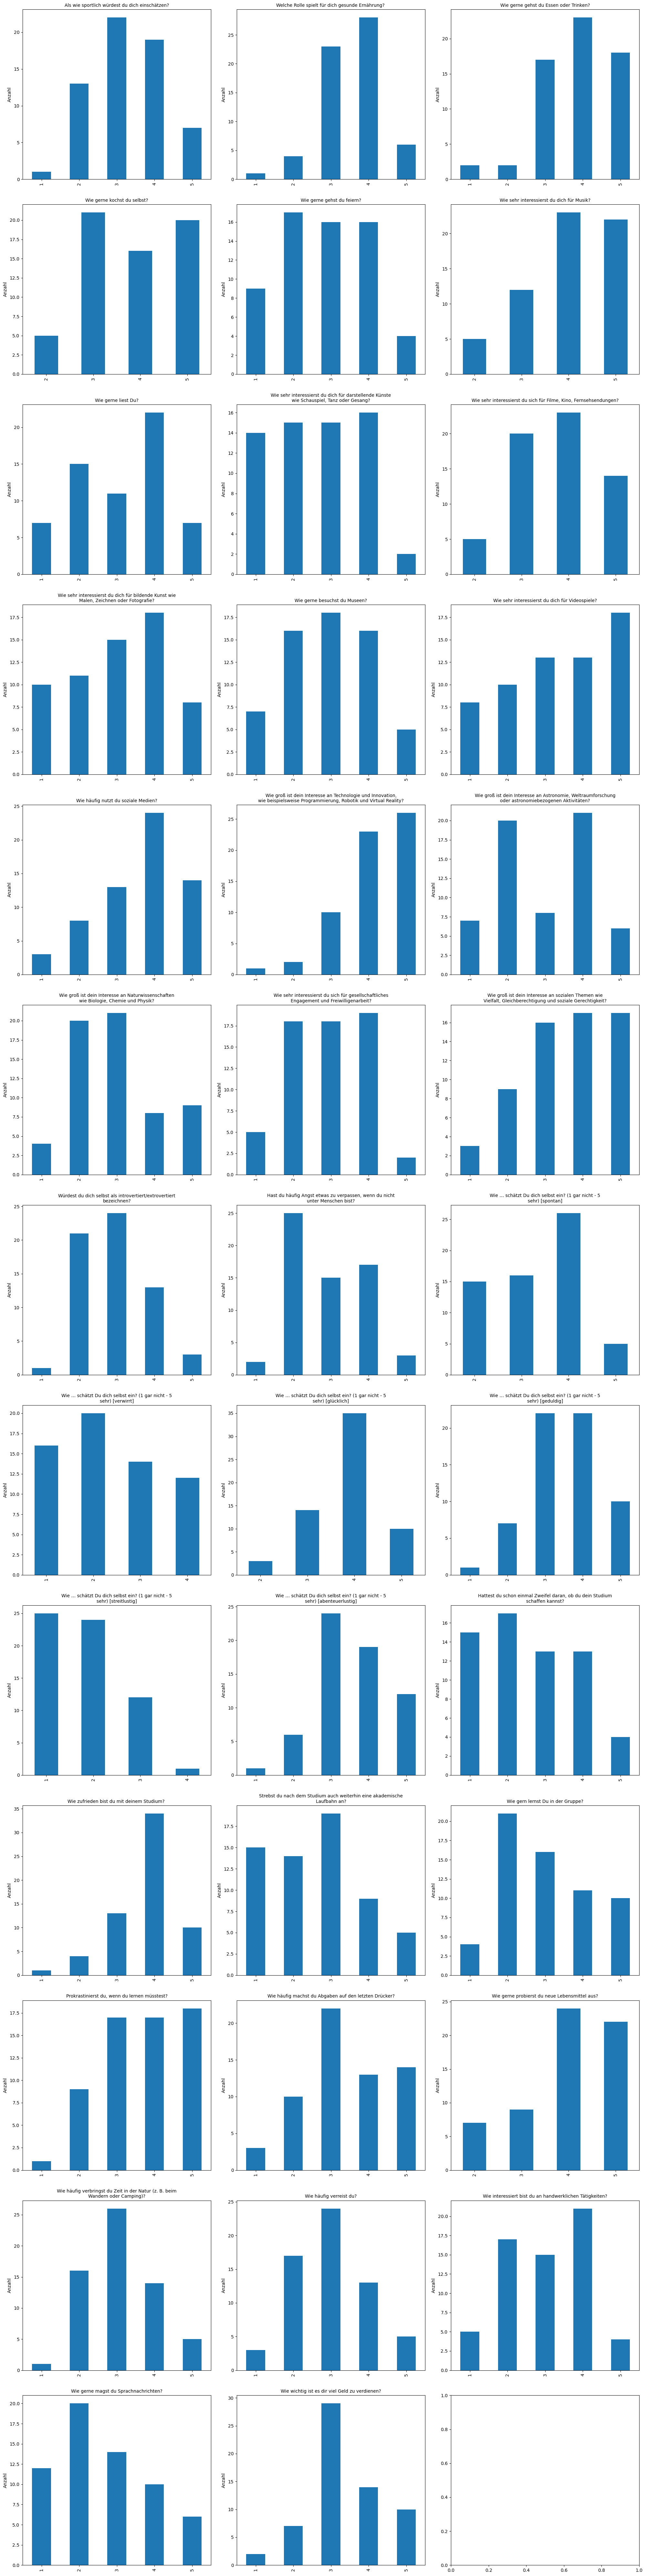

In [18]:
numeric_columns = data.select_dtypes(include=np.number).columns
columns_to_drop = encoded_columns.columns.to_list() + [columns.alter]
data_without_one_hot_encoded_columns_and_age = data[numeric_columns].drop(columns_to_drop, axis=1)

fig, axes = plt.subplots(13, 3, figsize=(20, 80), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.2, hspace=0, wspace=0)

for i, column in enumerate(data_without_one_hot_encoded_columns_and_age.columns):
  subplt = data[column].value_counts().sort_index().plot.bar(ax=axes[i//3, i%3], ylabel="Anzahl", xlabel="", title=column) # "//" ist Division mit Abrundung

Die Verteilung der Antworten ist je nach Frage sehr unterschiedlich: Bei der Frage "Strebst du nach dem Studium weiterhin eine akademische Laufbahn an" finden sich die meisten Antworten z. B. im Wertebereich von 1-3, also eher ablehnend bis neutral. Bei der Frage "Prokrastinierst du, wenn du lernen müsstest" ist dagegen eher der hohe Skalenbereich (3-5) vertreten. Andere Fragen, wie "Wie häufig verbringst du Zeit in der Natur" sind dagegen annähernd Gauß-verteilt, scheinen also nicht so eindeutig beantwortbar oder nicht so kontrovers zu sein.

### 4.2.3 Kategorische Features

Hier ist besonders interessant, in welchem Verhältnis die Antworten zueinander stehen? Wurde z. B. eine Lieblingssportart besonders oft genannt oder ist eine Band besonders beliebt?

In [19]:
non_numeric_colums = data.select_dtypes(exclude=["number"])
non_numeric_colums.describe()

,Geschlecht,Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Was ist deine absolute Lieblingssportart?,Was ist dein Lieblingsessen? (nur eines angeben),Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)
count,62,62,62,62,58,55
unique,2,3,4,41,36,51
top,männlich,Student*in,MMI,Fußball,Pizza,Antilopen Gang
freq,44,59,25,10,6,2


Die demographischen Daten wurden schon dargestellt, daher bleiben sie hier außen vor.

In [20]:
non_numeric_colums = non_numeric_colums.drop([columns.geschlecht, columns.studiengang, columns.funktion], axis=1)
non_numeric_colums.head()

,Was ist deine absolute Lieblingssportart?,Was ist dein Lieblingsessen? (nur eines angeben),Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)
0,Joggen,Vegane Lasagne,Kraftklub
1,Fußball,Butterbrot,Red hot Chili peppers
2,-,Lasagne,The 1975
3,Trampolin,Burger,NaN
4,Klettern,Dampfnudeln,NaN


Für die Freitextfragen werden jeweils die Antworten in einem Pie Chart dargestellt.

<Axes: title={'center': 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)'}>

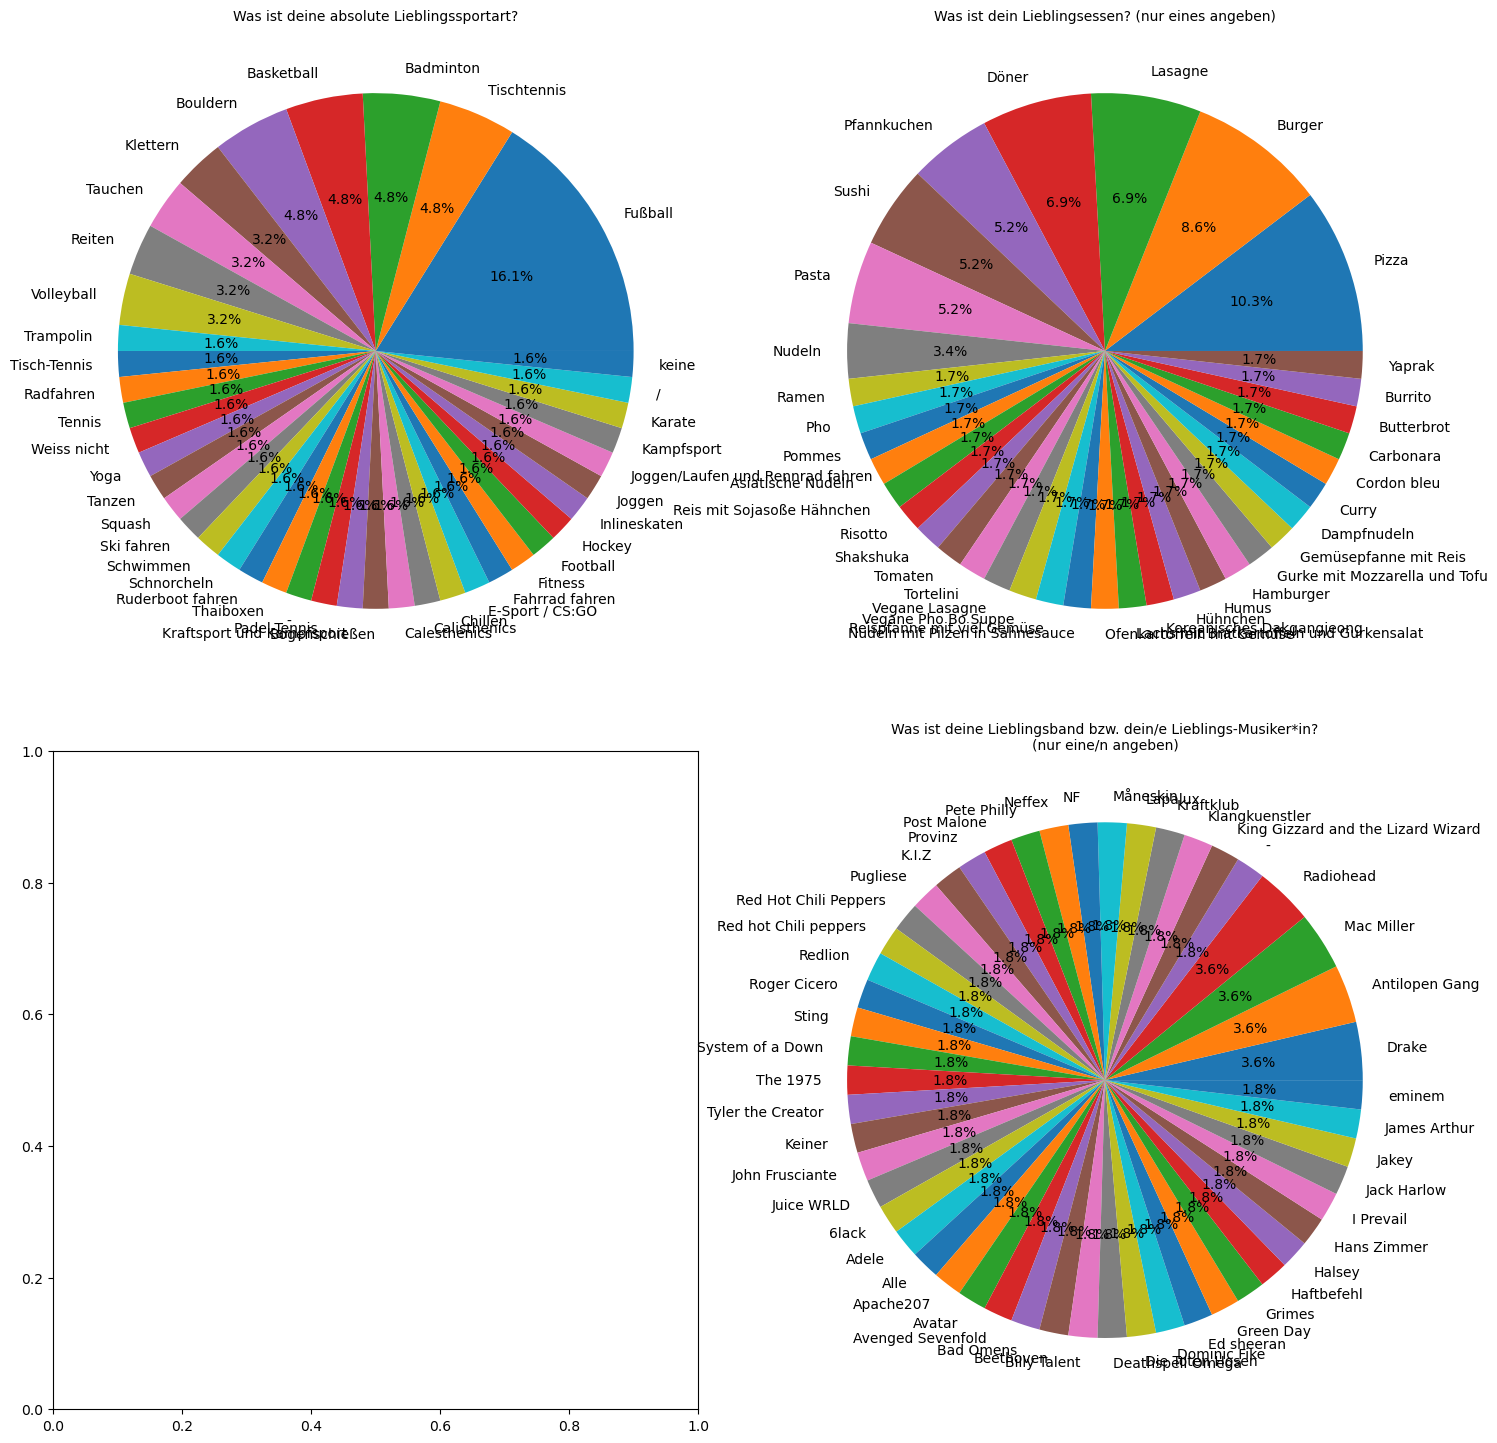

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=3)

data.value_counts(columns.lieblingssportart).plot.pie(ax=axes[0, 0], title=columns.lieblingssportart, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsessen).plot.pie(ax=axes[0, 1], title=columns.lieblingsessen, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsmusiker).plot.pie(ax=axes[1, 1], title=columns.lieblingsmusiker, ylabel="", autopct='%1.1f%%')

Es zeigt sich, dass es aufgrund der Freitextfelder in der Umfrage sehr viele unterschiedliche Antworten geben kann.

Außerdem sind die Daten hier "unrein". Fußball, Basketball und Calesthenics treten z. B. bei den Lieblingssportarten zweimal als unterschiedliche Werte auf (z. B. aufgrund von unterschiedlicher Schreibweise). Ähnliches gilt auch für die anderen beiden Kategorien.

Außerdem haben einige der Befragten bei der Frage nach der Lieblingssportart mit "Weiß nicht" oder "-" geantwortet. Ähnliches gilt auch für die anderen beiden Kategorien.

Des weiteren haben einige der Befragten bei der Lieblingssportart zwei oder mehr Sportarten eingegeben.


# 5. Weitere Aufbereitung der Daten auf Basis der Datenanalyse

## 5.1 Bereinigung der Daten

Die Daten werden basierend auf den Erkenntnissen aus dem vorherigen Kapitel aufbereitet. Dafür werden ungültige Angaben in eine neue Kategorie zusammengefasst, gleiche Kategorien mit verschiedenen Schreibweisen zusammengefasst und bei mehreren Antworten auf die Frage nach der Lieblingssportart werden alle Antworten nach der ersten entfernt.

### 5.1.1 "Lieblingssportart" aufbereiten

In [22]:
# combine all invalid values into one value
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace(["/", "-", "Weiss nicht", "keine", "Chillen"], "Keine Lieblingssportart")
data[columns.lieblingssportart].fillna("Keine Lieblingssportart", inplace=True)

# only use the first answer if someone selected multiple sports
data[columns.lieblingssportart] = data[columns.lieblingssportart].str.split("/", expand=True)[0]
data[columns.lieblingssportart] = data[columns.lieblingssportart].str.split("und", expand=True)[0]
data[columns.lieblingssportart].value_counts()

# combine "Fahrrad fahren" and "Radfahren" into one value
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Fahrrad fahren", "Radfahren")
# combine "Calesthenics" and "Calisthenics" into one category
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Calesthenics", "Calisthenics")
# combine "Tischtennis" and "Tisch-Tennis" into one category
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Tisch-Tennis", "Tischtennis")

### 5.1.2 "Lieblingsessen" aufbereiten

In [23]:
# combine all invalid values into one value
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace(["/", "-", "Weiss nicht", "kein", "keins"], "Kein Lieblingsessen")
data[columns.lieblingsessen].fillna("Kein Lieblingsessen", inplace=True)

# combine "Hamburger" and "Burger" into one category
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace("Hamburger", "Burger")
# combine "Pasta" and "Nudeln" into one category
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace("Nudeln", "Pasta")

### 5.1.3 "Lieblingsmusiker/-band" aufbereiten

In [24]:
# combine all invalid values into one value
data[columns.lieblingsmusiker] = data[columns.lieblingsmusiker].replace(["/", "-", "Alle", "Keiner", "keins"], "Kein Lieblingsmusiker")
data[columns.lieblingsmusiker].fillna("Kein Lieblingsmusiker", inplace=True)

# combine "Red Hot Chili Peppers" and "Red hot Chili peppers" into one category
data[columns.lieblingsmusiker] = data[columns.lieblingsmusiker].replace("Red hot Chili peppers", "Red Hot Chili Peppers")

### 5.1.4 Aufbereitete Daten plotten

<Axes: title={'center': 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)'}>

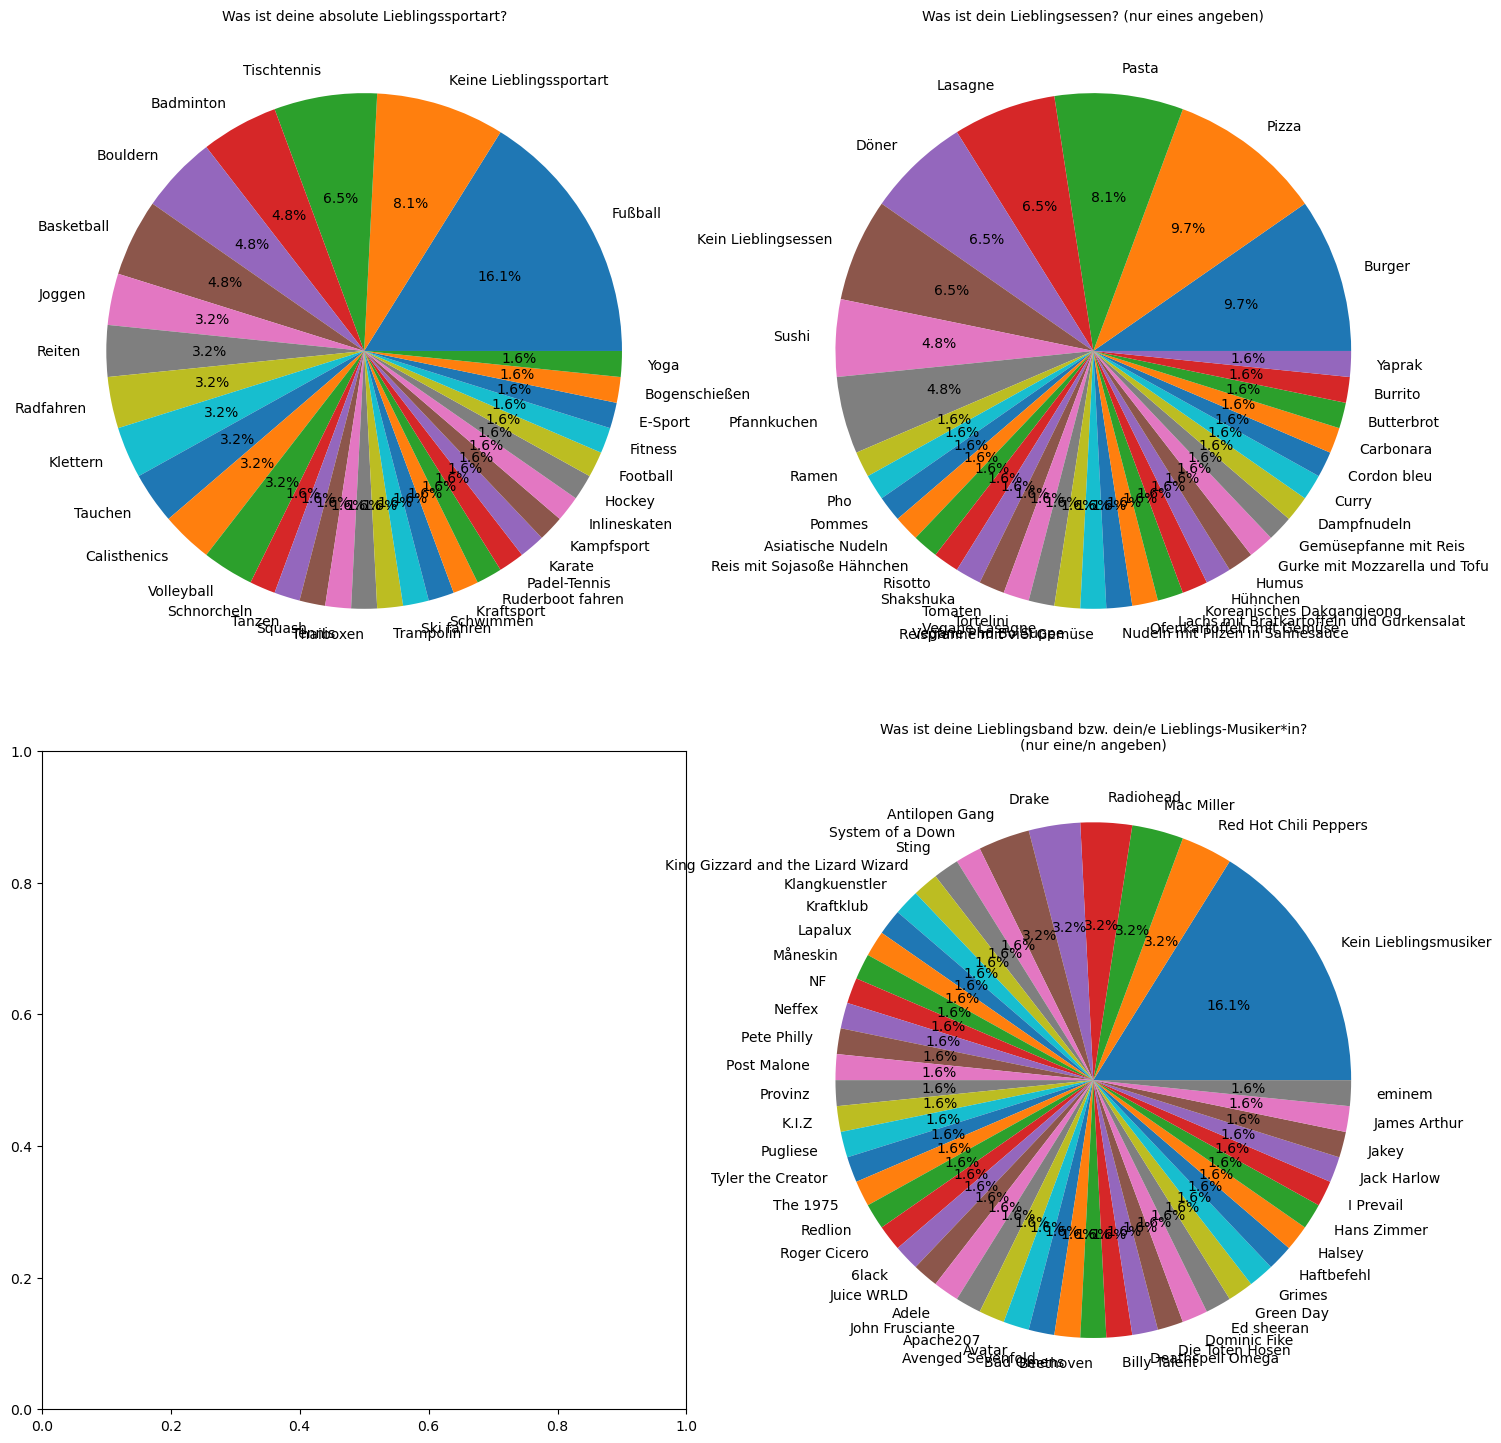

In [25]:
# plot again
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=3)

data.value_counts(columns.lieblingssportart).plot.pie(ax=axes[0, 0], title=columns.lieblingssportart, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsessen).plot.pie(ax=axes[0, 1], title=columns.lieblingsessen, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsmusiker).plot.pie(ax=axes[1, 1], title=columns.lieblingsmusiker, ylabel="", autopct='%1.1f%%')

# 6. Encoding & Weiterverarbeitung

## 6.1 Lieblingsmusiker mit dem Genre des Musikers ersetzen

Wie die Plots des vorherigen Kapitels zeigen, haben fast alle Befragten unterschiedliche Musiker/Bands angegeben. Daher gibt es kaum Überschneidungen zwischen den Personen (maximal zwei Personen haben die selbe Band oder den selben Musiker genannt). Für die Clusterbildung, das Machine Learning und den Student Matcher selbst sind die Daten daher kaum hilfreich.

Als Lösung wird statt Lieblingsmusiker oder Band das Genre dieser gespeichert. Dafür wird die API von _Deezer_ angefragt.

In [26]:
musicians = data[columns.lieblingsmusiker]
genres = []

for musician in musicians:
    if(musician != "Kein Lieblingsmusiker"):
        genre_id = requests.get(f"https://api.deezer.com/search/album?q={musician}").json()["data"][0]["genre_id"]
        if genre_id != -1:
            genre = requests.get(f"https://api.deezer.com/genre/{genre_id}").json()["name"]
        else:
            genre = "Kein Lieblingsgenre"

        genres.append(genre)
        print(musician, genre)
    else:
        genres.append("Kein Lieblingsgenre")
        print(musician, "Kein Lieblingsgenre")

Kraftklub Rock
Red Hot Chili Peppers Rock
The 1975 Alternative
Kein Lieblingsmusiker Kein Lieblingsgenre
Kein Lieblingsmusiker Kein Lieblingsgenre
Kein Lieblingsmusiker Kein Lieblingsgenre
Pugliese Pop
Green Day Alternative
Pete Philly Rap/Hip Hop
Radiohead Alternative
Dominic Fike Alternative
Redlion Kein Lieblingsgenre
James Arthur Pop
eminem Rap/Hip Hop
Jakey Rap/Hip Hop
Apache207 Rap/Hip Hop
Antilopen Gang Rap/Hip Hop
Drake Rap/Hip Hop
I Prevail Rock
Bad Omens Rock
Provinz Pop
Post Malone Pop
Juice WRLD Rap/Hip Hop
Avenged Sevenfold Rock
Kein Lieblingsmusiker Kein Lieblingsgenre
Klangkuenstler Electro
Lapalux Electro
Jack Harlow Rap/Hip Hop
K.I.Z Rap/Hip Hop
Adele Pop
King Gizzard and the Lizard Wizard Alternative
Drake Rap/Hip Hop
Billy Talent Alternative
Kein Lieblingsmusiker Kein Lieblingsgenre
System of a Down Rock
Sting Pop
Roger Cicero Pop
Kein Lieblingsmusiker Kein Lieblingsgenre
Mac Miller Rap/Hip Hop
Avatar Heavy Metal
Kein Lieblingsmusiker Kein Lieblingsgenre
Måneskin Roc

### 6.1.1 Aufbereitete Daten zwischenspeichern

Um die aufbereiteten Daten im weiteren Prozess nutzen zu können, werden sie als CSV und im Jupyter Store gespeichert.

In [27]:
data, columns = lh.add_column_to_data_and_short_labels(data, columns, "genre_lieblingsmusiker", genres, "Genre des Lieblingsmusikers (encoded)")
data, columns = lh.remove_column_from_data_and_short_labels(data, columns, "lieblingsmusiker")

# write the cleaned data to a new csv file
data.to_csv("../datasets/data_cleaned.csv", index=False)

%store data
%store columns

# create a dataframe with the genres and store it
df_genres = data[columns.genre_lieblingsmusiker]
%store df_genres

Stored 'data' (DataFrame)
Stored 'columns' (Series)
Stored 'df_genres' (Series)


### 6.1.2 Genres plotten

<Axes: title={'center': 'Genre des Lieblingsmusikers (encoded)'}>

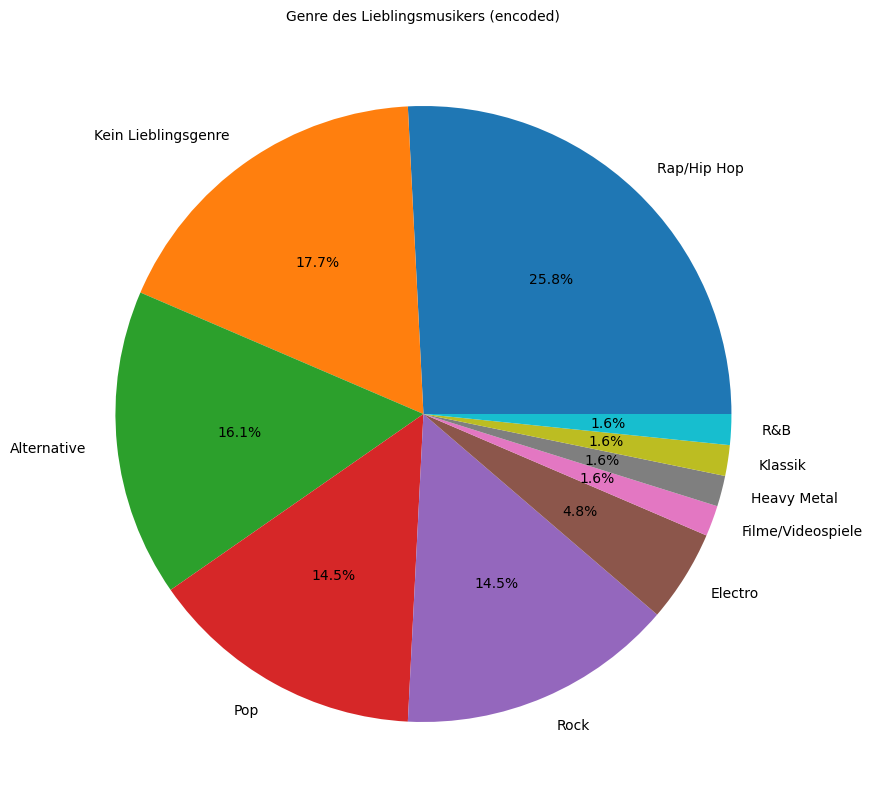

In [28]:
data.value_counts(columns.genre_lieblingsmusiker).plot.pie(title=columns.genre_lieblingsmusiker, ylabel="", autopct='%1.1f%%', figsize=(10, 10))

Es zeigt sich, dass die Einteilung in Genres dafür sorgt, dass es nun wesentlich weniger Kategorien gibt und die Verteilung der Befragten auf die Genres sogar recht gleichmäßig ist. Fast 90% der Befragten finden sich in den Genres "Rap/Hip Hop", "Alternative", "Pop" und "Rock" wieder oder haben keinen Lieblingsmusiker angegeben.

## 6.2 "Funktion", "Studiengang", "Lieblingssportart", "Lieblingsessen" und "Genre des Lieblingsmusikers" encoden

Die Features "Funktion", "Studiengang", "Lieblingssportart", "Lieblingsessen" und "Genre des Lieblingsmusikers" sind im Original-Datensatz nicht numerisch. Für die weitere Verarbeitung der Daten sollen sie daher encoded werden. Da es sich bei diesen Features um Features mit einer Nominalskala handelt, wird dafür One-Hot-Encoding verwendet (Label Encoding würde eine nicht vorhandene Rangordnung reinbringen).

In [29]:
data_encoded, columns_encoded = lh.one_hot_encode_columns_and_update_short_labels(
  df=data,
  columns=columns,
  columns_to_encode_short_labels=["lieblingssportart", "lieblingsessen", "studiengang", "funktion", "genre_lieblingsmusiker"],
)

## 6.3 "Geschlecht" als numerische Werte

Auch das Feature "Geschlecht" soll encoded werden. Da niemand mit "divers" geantwortet hat, können die Geschlechter einfach mit 0 und 1 (also quasi weiblich ja oder nein) codiert werden.

In [30]:
data_is_female = [int(sex == 'weiblich') for sex in data_encoded[columns.geschlecht]]

data_encoded, columns_encoded = lh.add_column_to_data_and_short_labels(df=data_encoded, all_columns=columns_encoded, new_short_label="geschlecht_weiblich", column_df=data_is_female, full_question='Geschlecht (weiblich?)')
data_encoded, columns_encoded = lh.remove_column_from_data_and_short_labels(df=data_encoded, all_columns=columns_encoded, column_to_drop_short_label="geschlecht")

### 6.3.1 Alle Features nach dem Encoding ausgeben

Wie in der Übersicht der Daten zu sehen ist, wurde einige Features im Datentyp uint8 codiert. Um Probleme bei der späteren Verarbeitung zu vermeiden, werden alle numerischen Datentypen in den Typ Integer überführt.

In [31]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 142 entries, Alter to Geschlecht (weiblich?)
dtypes: int64(57), uint8(85)
memory usage: 32.9 KB


In [32]:
data_encoded = data_encoded.astype('int')
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 142 entries, Alter to Geschlecht (weiblich?)
dtypes: int32(142)
memory usage: 34.5 KB


In [ ]:
# display(HTML(columns_encoded.to_frame().to_html()))

# 7 Entfernen von Spalten mit geringer Varianz

Wie bereits in den vorherigen Visualisierung festgestellt, gibt es insbesondere bei der (Multiselect-)Auswahl der Interesse an vorgegebenen Sportarten und den kategorialen Angaben einige Features, die (fast) ausschließlich Datenpunkte mit den Werten "0" enthalten, beispielsweise weil die jeweilige Kategorie nur von einer einzigen Person angegeben wurden. Solche Features erweitern in ihrer Gesamtheit die Dimensionen des Datensets erheblich, ohne zielführende Informationen für die weitere Information zu liefern. Daher soll mithilfe der Varianz als Grenzwert die Anzahl solcher Features von insgesamt 142 verringert werden.

In [34]:
data_encoded.count()

Alter                                               62
Als wie sportlich würdest du dich einschätzen?      62
Welche Rolle spielt für dich gesunde Ernährung?     62
Wie gerne gehst du Essen oder Trinken?              62
Wie gerne kochst du selbst?                         62
                                                    ..
Genre Lieblingsmusiker Pop? (encoded)               62
Genre Lieblingsmusiker R&B? (encoded)               62
Genre Lieblingsmusiker Rap Hip Hop? (encoded)       62
Genre Lieblingsmusiker Rock? (encoded)              62
Geschlecht (weiblich?)                              62
Length: 142, dtype: int64

Bei der Ausgabe der Varianzwerte für jedes Feature ist zu erkennen, dass die Varianz insbesondere bei vielen der aus den Freitextfeldern entstandenen Kategorien sehr niedrig ist. Diese Beobachtung ist auch naheliegend, da hierbei bis auf eine oder ein paar wenige Stellen bei allen Datenpunkten der Wert "0" eingetragen ist, was in der Varianz zu einem auffällig niedrigem Wert führt.

In [35]:
with pd.option_context('display.max_rows', None):
    print(data_encoded.var().sort_values())

Lieblingssportart Ski Fahren? (encoded)                                                                                         0.016129
Lieblingsessen Nudeln Mit Pilzen In Sahnesauce? (encoded)                                                                       0.016129
Lieblingssportart Ruderboot Fahren? (encoded)                                                                                   0.016129
Lieblingssportart Padel-Tennis? (encoded)                                                                                       0.016129
Lieblingsessen Vegane Pho Bo Suppe? (encoded)                                                                                   0.016129
Lieblingsessen Pommes? (encoded)                                                                                                0.016129
Lieblingsessen Carbonara? (encoded)                                                                                             0.016129
Lieblingsessen Ofenkartoffeln Mit Gemüse?

Anhand der vorherigen Visualisierungen und der dort zu erkennenden Anzahl von Datenpunkten, die für das jeweilige Feature einen anderen Wert als "0" beinhalten, wird der Grenzwert von 0.04 als angemessen angesehen, um die Anzahl von Features reduzieren zu können, und gleichzeitig keine "ausreichend wichtigen" Features zu entfernen.

In [36]:
selector = VarianceThreshold(threshold = 0.04)
selector.fit_transform(data_encoded)

array([[28,  4,  4, ...,  0,  1,  0],
       [26,  3,  4, ...,  0,  1,  0],
       [24,  2,  5, ...,  0,  0,  0],
       ...,
       [25,  3,  3, ...,  1,  0,  1],
       [31,  3,  4, ...,  0,  0,  1],
       [25,  2,  2, ...,  0,  0,  0]])

Zur einfacheren Berechnung der zu entfernenden Features wird die Bibliothek "VarianceThreshold" genutzt, die 61 Features erkannt hat, die unterhalb des festgelegten Grenzwertes für die Varianz liegen. Diese werden im Folgenden entfernt.

In [37]:
columns_to_drop = [column for column in columns_encoded if column not in data_encoded.columns[selector.get_support()]]
len(columns_to_drop), columns_to_drop

(61,
 ['Interesse an Reiten? (encoded)',
  'Lieblingssportart Bogenschießen? (encoded)',
  'Lieblingssportart Calisthenics? (encoded)',
  'Lieblingssportart E-Sport? (encoded)',
  'Lieblingssportart Fitness? (encoded)',
  'Lieblingssportart Football? (encoded)',
  'Lieblingssportart Hockey? (encoded)',
  'Lieblingssportart Inlineskaten? (encoded)',
  'Lieblingssportart Joggen? (encoded)',
  'Lieblingssportart Kampfsport? (encoded)',
  'Lieblingssportart Karate? (encoded)',
  'Lieblingssportart Klettern? (encoded)',
  'Lieblingssportart Kraftsport? (encoded)',
  'Lieblingssportart Padel-Tennis? (encoded)',
  'Lieblingssportart Radfahren? (encoded)',
  'Lieblingssportart Reiten? (encoded)',
  'Lieblingssportart Ruderboot Fahren? (encoded)',
  'Lieblingssportart Schnorcheln? (encoded)',
  'Lieblingssportart Schwimmen? (encoded)',
  'Lieblingssportart Ski Fahren? (encoded)',
  'Lieblingssportart Squash? (encoded)',
  'Lieblingssportart Tanzen? (encoded)',
  'Lieblingssportart Tauchen? (enc

Da die Spalten-/Featurenamen während der Berechnung durch kürzere Schlüsselwörter ersetzt werden, müssen die berechneten Spaltennamen zunächst auf die zu entfernenden Schlüsselwörter gemappt werden.

In [38]:
columns_encoded_to_drop = [column_key for column_key in columns_encoded.keys() if (columns_encoded[column_key] in columns_to_drop)]
columns_encoded_to_drop

['sportarten_Reiten',
 'lieblingssportart_bogenschießen',
 'lieblingssportart_calisthenics',
 'lieblingssportart_e-sport',
 'lieblingssportart_fitness',
 'lieblingssportart_football',
 'lieblingssportart_hockey',
 'lieblingssportart_inlineskaten',
 'lieblingssportart_joggen',
 'lieblingssportart_kampfsport',
 'lieblingssportart_karate',
 'lieblingssportart_klettern',
 'lieblingssportart_kraftsport',
 'lieblingssportart_padel-tennis',
 'lieblingssportart_radfahren',
 'lieblingssportart_reiten',
 'lieblingssportart_ruderboot_fahren',
 'lieblingssportart_schnorcheln',
 'lieblingssportart_schwimmen',
 'lieblingssportart_ski_fahren',
 'lieblingssportart_squash',
 'lieblingssportart_tanzen',
 'lieblingssportart_tauchen',
 'lieblingssportart_tennis',
 'lieblingssportart_thaiboxen',
 'lieblingssportart_trampolin',
 'lieblingssportart_volleyball',
 'lieblingssportart_yoga',
 'lieblingsessen_asiatische_nudeln',
 'lieblingsessen_burrito',
 'lieblingsessen_butterbrot',
 'lieblingsessen_carbonara',

In [39]:
for column_to_drop in columns_encoded_to_drop:
    data_encoded, columns_encoded = lh.remove_column_from_data_and_short_labels(data_encoded, columns_encoded, column_to_drop)

data_encoded.columns, columns_encoded

(Index(['Alter', 'Als wie sportlich würdest du dich einschätzen?',
        'Welche Rolle spielt für dich gesunde Ernährung? ',
        'Wie gerne gehst du Essen oder Trinken?', 'Wie gerne kochst du selbst?',
        'Wie gerne gehst du feiern?',
        'Wie sehr interessierst du dich für Musik?', 'Wie gerne liest Du?',
        'Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?',
        'Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?',
        'Wie sehr interessierst du dich für bildende Kunst wie\nMalen, Zeichnen oder Fotografie?',
        'Wie gerne besuchst du Museen?',
        'Wie sehr interessierst du dich für Videospiele?',
        'Wie häufig nutzt du soziale Medien?',
        'Wie groß ist dein Interesse an Technologie und Innovation,\nwie beispielsweise Programmierung, Robotik und Virtual Reality?',
        'Wie groß ist dein Interesse an Astronomie, Weltraumforschung\noder astronomiebezogenen Aktivitäten?',
        

## 7.1 Die encodeten und gefilterten Daten zwischenspeichern

In [40]:
# write the cleaned and encoded data to a new csv file and the store
data_encoded.to_csv("../datasets/data_cleaned_encoded.csv", index=False)

%store data_encoded
%store columns_encoded

Stored 'data_encoded' (DataFrame)
Stored 'columns_encoded' (Series)
